<a href="https://colab.research.google.com/github/Venni2911/LogicMojo-AI-ML-Sept25-VenniRaj/blob/main/Imbalance_Classification_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalance Classification Methods

**Agenda**

* What is Imbalanced Data?
* Problems with the Imbalanced Data
* Choosing the right Evaluation Metrics
* Imbalanced Dataset - Creating an example
* Class Imbalance Handling in Machine Learning
* Class Weights
* Balancing data with the Imbalanced-Learn module in Python
* Random Under-Sampling
* Random Over-Sampling
* Synthetic Minority Oversampling Technique (SMOTE)
* Tomek Links
* Comparison of the Results
* Conclusion



## What is Imbalanced Data?

Imbalanced data pertains to datasets where the distribution of observations in the target class is uneven. In other words, one class label has a significantly higher number of observations, while the other has a notably lower count.

When one class greatly outnumbers the others in a classification, there is imbalanced data.

* While working as a data scientist, some of the most frequently occurring problem statements are related to binary classification.
* A common problem when solving these problem statements is that of class imbalance. When observation in one class is higher than in other classes, a class imbalance exists.
* Example: To detect fraudulent credit card transactions. As shown in the graph below, the fraudulent transaction is around 400 compared to the non-fraudulent transaction of around 90000.

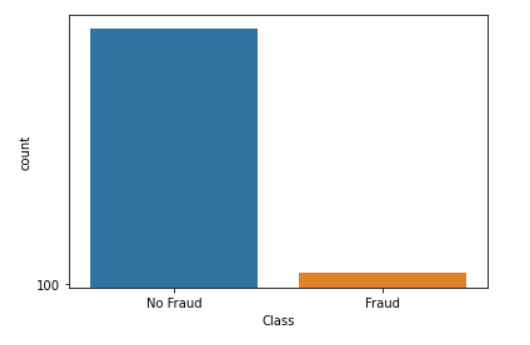

## Problems with the imbalanced data

- Unbalanced class distributions present a barrier, even though many machine learning algorithms work best when there are nearly equal numbers of samples in each class.

- A model may appear to have high accuracy in these situations if it primarily predicts the majority class.

- In such cases, having high accuracy becomes deceptive.

- Minority class observations look like noise to the model and are ignored by the model. The minority class - which is frequently the main focus of model creation - is ignored by this strategy.

-  In the event that 99% of the data pertains to the majority class, for example, simple classification models such as logistic regression or decision trees may find it difficult to recognize and precisely forecast occurrences from the minority class.

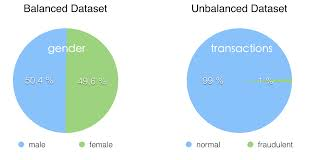

## Choosing the Right Evaluation Metrics

* Normally, we use **Accuracy** as the evaluation metric after training any model and is calculated by dividing the total correct predictions by the overall predictions, which is suitable for balanced classes but less effective for imbalanced datasets.

* Precision gauges the accuracy of a classifier in predicting a specific class, while recall assesses its ability to correctly identify a class.

* In imbalanced datasets, **the F1 score emerges as a preferred metric**, striking a balance between precision and recall, providing a more comprehensive evaluation of a classifier's performance. It can be expressed as the mean of recall and accuracy.

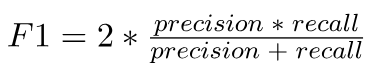

* Precision and F1 score both decrease when the classifier incorrectly predict the minority class, increasing the number of false positives.

* Recall and F1 score also drop if the classifier have trouble accurately identifying the minority class, leading to more false negatives. In particular, the F1 score only becomes better when the amount and accuracy of predictions get better.

* F1 score is essentially a comprehensive statistic that takes into account the trade-off between precision and recall, which is critical for assessing classifier performance in datasets that are imbalanced.

The **ROC - AUC** is also beneficial metric to use in Imbalanced Learning. It is sensitive to class imbalance in the sense that when there is a minority class, you typically define this as the positive class and it will have a strong impact on the AUC value. This is very much desirable behaviour.

## Imbalanced Dataset - Creating an Example

Let's create an imbalanced dataset of our own just to grasp the concepts. We will keep the majority class to minority class ratio to be 95:5, and we will take 1000 records.


In [ ]:
# Importing scikit-learn, pandas library
from sklearn.utils import resample
from sklearn.datasets import make_classification
import pandas as pd

# Making DataFrame having 1000
# dummy samples with 4 features
# Divided in 2 classes in a ratio of 80:20
X, y = make_classification(n_classes=2,
                           weights=[0.95, 0.05],
                           n_features=4,
                           n_samples=1000,
                           random_state=42)

df = pd.DataFrame(X, columns=['feature_1',
                              'feature_2',
                              'feature_3',
                              'feature_4'])

In [ ]:
df.head()

,feature_1,feature_2,feature_3,feature_4
0,-1.194848,1.138331,-1.482079,1.025358
1,0.290131,0.317681,-0.996519,0.477009
2,-0.522737,-0.121434,0.765888,-0.308384
3,1.738138,-0.188065,-1.195371,0.302161
4,1.828884,-0.289261,-1.049151,0.206271


In [ ]:
df['class'] = y

In [ ]:
df.head()

,feature_1,feature_2,feature_3,feature_4,class
0,-1.194848,1.138331,-1.482079,1.025358,0
1,0.290131,0.317681,-0.996519,0.477009,0
2,-0.522737,-0.121434,0.765888,-0.308384,0
3,1.738138,-0.188065,-1.195371,0.302161,0
4,1.828884,-0.289261,-1.049151,0.206271,0


Here, we have successfully created our own dataset.

**Now, let's train a Logistic Regression Model before handling the class imbalance, and see what happens.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Splitting the data into train and test sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_log, y_train_log)

# Predict on the test set
y_pred = log_reg.predict(X_test_log)

# Calculate evaluation metrics
precision = precision_score(y_test_log, y_pred)
recall = recall_score(y_test_log, y_pred)
f1 = f1_score(y_test_log, y_pred)
roc_auc = roc_auc_score(y_test_log, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Precision: 1.0
Recall: 0.21428571428571427
F1 Score: 0.35294117647058826
ROC AUC Score: 0.6071428571428571


Let's break down the obtained results:

* **Precision**: Precision measures the accuracy of positive predictions. In this case, it indicates the proportion of correctly predicted positive samples (minority class) out of all samples predicted as positive. A precision score of 1.0 means that all positive predictions were correct. However, precision alone is not enough to assess model performance on imbalanced datasets, especially when the negative class dominates the dataset.

* **Recall**: Recall, also known as sensitivity, measures the ability of the model to capture positive instances. It indicates the proportion of correctly predicted positive samples out of all actual positive samples. A recall score of 0.214 means that only about 21.4% of actual positive samples were correctly identified by the model. In imbalanced datasets, a low recall indicates that the model struggles to detect the minority class.

* **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, where higher values indicate better overall performance. In this case, the F1 score is 0.353, indicating a moderate balance between precision and recall. However, it's important to note that F1 score can be biased towards the dominant class in imbalanced datasets.

* **ROC AUC Score**: ROC AUC (Receiver Operating Characteristic - Area Under the Curve) is a metric that evaluates the model's ability to distinguish between classes. It represents the area under the ROC curve, where a score of 0.5 indicates random guessing and a score of 1.0 indicates perfect separation between classes. The ROC AUC score of 0.607 suggests that the model performs slightly better than random guessing but still struggles to effectively differentiate between classes.


Overall, these results highlight the challenges of dealing with imbalanced datasets. While the model achieves perfect precision, it comes at the cost of significantly lower recall, indicating a trade-off between minimizing false positives and capturing true positives. In the following sections, we'll explore various methods to address these challenges and improve model performance on imbalanced datasets.

**Before proceeding further, let's divide our dataset into two parts - one with the majority class, and the other with minority class.**


In [ ]:
# Let df represent the dataset
# Dividing majority and minority classes
df_major = df[df['class'] == 0]
df_minor = df[df['class'] == 1]

In [ ]:
df_major.shape

(945, 5)

In [ ]:
df_minor.shape

(55, 5)

## Class Imbalance Handling in Machine Learning

There are multiple methods to handle the Imbalanced data. Some of them are mentioned below -

* **Class Weights**: Assigns higher weights to minority class instances during model training to penalize misclassifications of the minority class more heavily, thereby addressing class imbalance.

* **Random Under-Sampling**: Randomly removes instances from the majority class to balance the class distribution, effectively reducing the dominance of the majority class.

* **Random Over-Sampling**: Randomly duplicates instances from the minority class to balance the class distribution, increasing the representation of the minority class.
* **Synthetic Minority Oversampling Technique (SMOTE)**: Generates synthetic samples for the minority class by interpolating between existing minority class instances, effectively increasing the diversity of the minority class.
* **Under-Sampling: Tomek Links**: Identifies and removes Tomek links, pairs of instances from different classes that are nearest neighbors of each other, aiming to improve class separability in the feature space.
* **Use K-fold Cross-Validation in the Right Way**: Utilizes K-fold cross-validation technique to evaluate model performance while ensuring that each fold maintains the class distribution, preventing biased evaluation on imbalanced datasets.
* **Ensemble Different Resampled Datasets**: Combines predictions from multiple models trained on different resampled datasets, leveraging diversity to improve overall model performance on imbalanced datasets.


**We will learn more about these techniques in depth in the following sections**

## Class Weights

* Class Weights in the context of imbalanced classification refers to assigning different weights to classes during model training to address the imbalance. This technique is particularly useful when using algorithms that support class weighting, such as logistic regression, decision trees, and support vector machines.

* The idea behind class weights is to penalize misclassifications of the minority class more heavily, thus encouraging the model to pay more attention to correctly predicting the minority class instances. This is achieved by adjusting the cost function used during model training to reflect the class distribution.

* In logistic regression, class weights are incorporated into the optimization objective function by adjusting the loss function. Specifically, the loss function is modified to give higher weight to misclassifications of the minority class, effectively making them more costly to the model.

**Class weights are calculated using the following formula -**

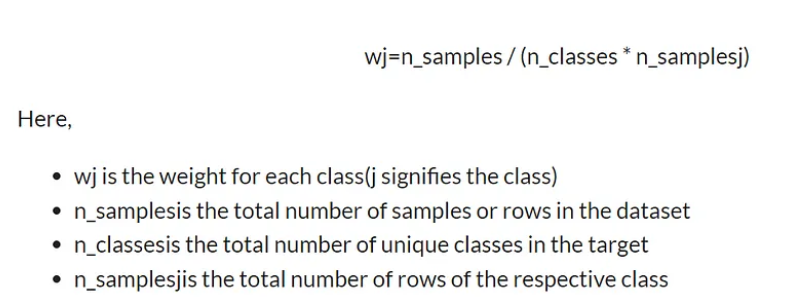

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Splitting the data into train and test sets
X_train_cw, X_test_cw, y_train_cw, y_test_cw = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function to calculate class weights
def calculate_class_weights(y_train):
    # Get unique classes and their counts
    unique_classes, class_counts = np.unique(y_train, return_counts=True)

    # Total number of samples
    total_samples = len(y_train)

    class_weights = {}

    # Calculate class weights
    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)  # We have used n_classes = 2, because we have 2 classes - 0 and 1
        class_weights[class_label] = class_weight

    return class_weights

# Calculate class weights for the training data
class_weights = calculate_class_weights(y_train_cw)

# Print the calculated Class Weights
print(class_weights)

{0: 0.5270092226613966, 1: 9.75609756097561}


Here, we can see that a weight of 0.5270092226613966 has been assigned to 0 (the majority class), and a weight of 9.75609756097561 has been assigned to 1 (the minority class).

Let's now train a Logistic Regression Model using these class weights and obtain the results.

In [ ]:
# Train logistic regression model with class weights
log_reg_weighted = LogisticRegression(class_weight = class_weights)
log_reg_weighted.fit(X_train_cw, y_train_cw)

# Predict on the test set
y_pred_weighted = log_reg_weighted.predict(X_test_cw)

# Calculate evaluation metrics
precision_weighted = precision_score(y_test_cw, y_pred_weighted)
recall_weighted = recall_score(y_test_cw, y_pred_weighted)
f1_weighted = f1_score(y_test_cw, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test_cw, y_pred_weighted)

# Print the evaluation metrics
print("Precision (weighted):", precision_weighted)
print("Recall (weighted):", recall_weighted)
print("F1 Score (weighted):", f1_weighted)
print("ROC AUC Score (weighted):", roc_auc_weighted)

Precision (weighted): 0.37037037037037035
Recall (weighted): 0.7142857142857143
F1 Score (weighted): 0.4878048780487805
ROC AUC Score (weighted): 0.8114439324116745


* **Precision**: Precision decreased from 1.0 to 0.37. This suggests that while the model with class weights achieved a lower precision, it likely provides a more balanced trade-off between true positives and false positives, particularly in the minority class.

* **Recall**: Recall increased significantly from 0.21 to 0.714. This indicates that the model with class weights is much better at capturing actual positive instances, especially in the minority class.

* **F1 Score**: F1 score increased from 0.35 to 0.488. This suggests an improvement in the balance between precision and recall with the use of class weights.

* **ROC AUC Score**: ROC AUC score also improved from 0.60 to 0.811, indicating better discrimination ability between classes with the class-weighted approach.

Overall, incorporating class weights into the logistic regression model led to significant improvements in recall, F1 score, and ROC AUC score, indicating better performance in correctly identifying positive instances (especially in the minority class) while maintaining a reasonable level of precision.

## Balancing data with the Imbalanced-Learn module in Python

Balancing data is a crucial step in addressing class imbalance in machine learning tasks. The imbalanced-learn library in Python (often abbreviated as imblearn) provides a comprehensive set of tools for tackling imbalanced datasets. It offers various resampling techniques, algorithms, and evaluation metrics tailored specifically for imbalanced classification problems.

**Benefits of Imbalanced-Learn**

* **Simplicity**: Imbalanced-learn provides a user-friendly interface, making it easy to implement and experiment with various resampling techniques.
* **Flexibility**: It offers a wide range of resampling methods, allowing users to choose the most suitable technique based on their dataset and problem.
* **Compatibility**: Imbalanced-learn seamlessly integrates with popular machine learning libraries such as scikit-learn, enabling easy incorporation into existing workflows.
* **Comprehensive Documentation**: The library comes with detailed documentation and examples, making it easy for users to understand and apply the techniques.

In summary, the Imbalanced-Learn module in Python offers powerful tools for effectively addressing class imbalance in machine learning tasks, providing resampling techniques that help improve model performance on imbalanced datasets.

In [ ]:
import imblearn

## Random Under-Sampling

* Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

- One good thing in imblearn is RandomUnderSampler.

- It's a quick and simple way to even out the data by randomly choosing some data from the classes we want to balance.

- Basically, it grabs a bunch of samples from the majority class (or classes) in a random way.

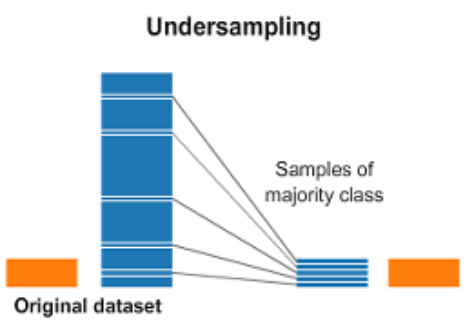

**Advantages of Random Under-Sampling**

* **Computationally Efficient**: Random under-sampling involves removing instances from the majority class randomly, making it computationally efficient, especially for large datasets.

* **Simplicity**: Random under-sampling is straightforward to implement and does not require complex algorithms or parameter tuning.

* **Preserves Information**: Unlike some other resampling techniques that generate synthetic samples, random under-sampling preserves the original data instances, avoiding the introduction of potentially misleading synthetic data points.

**Disadvantages of Random Under-Sampling**

* **Loss of Information**: Randomly removing instances from the majority class can lead to a significant loss of information, especially if the removed instances contain valuable patterns or characteristics.

* **Risk of Overfitting**: Reducing the size of the majority class without considering the underlying data distribution may increase the risk of overfitting, as the model may learn from a less representative subset of the data.

* **Potential Bias**: Random under-sampling can introduce bias into the dataset, especially if the removed instances contain important information or if the remaining dataset becomes unrepresentative of the original distribution.

* **May Not Capture Rare Patterns**: If the majority class contains rare but significant patterns or outliers, random under-sampling may remove these instances, leading to a loss of important information.

**Syntax: RandomUnderSampler(sampling_strategy='auto', random_state=None, replacement=False)**

Parameters:

- **sampling_strategy**: Sampling Information for dataset.

- **random_state**: Used for shuffling the data. If positive non zero number is given then it shuffles otherwise not. Default value is None.

- **replacement**: Implements resampling with or without replacement. Boolean type of value. Default value is False.

In [ ]:
# Importing imblearn library
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Printing number of samples
# in each class before Under-Sampling
t = [(d) for d in y if d == 0]
s = [(d) for d in y if d == 1]
print('Before Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

Before Under-Sampling: 
Samples in class 0:  945
Samples in class 1:  55


In [ ]:
# Down-Sampling majority class
UnderS = RandomUnderSampler(random_state=42,
                            replacement=True)

In [ ]:
# Fit predictor (x variable)
# and target (y variable) using fit_resample()
X_Under, Y_Under = UnderS.fit_resample(X, y)

In [ ]:
# Printing number of samples in
# each class after Under-Sampling
t = [(d) for d in Y_Under if d == 0]
s = [(d) for d in Y_Under if d == 1]
print('After Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

After Under-Sampling: 
Samples in class 0:  55
Samples in class 1:  55


- Above code illustrates how to rectify class imbalance in a dataset using RandomUnderSampler from imbalanced-learn.

- By removing samples at random from the majority class, it improves the balance of the class distribution.

- For comparison, the number of samples in each class is printed both before and after undersampling.

Now, Let's train a Logistic Regression Model to see what happens

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Split the data into train and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_Under, Y_Under, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_under = log_reg_under.predict(X_test_under)

# Calculate evaluation metrics
precision_under = precision_score(y_test_under, y_pred_under)
recall_under = recall_score(y_test_under, y_pred_under)
f1_under = f1_score(y_test_under, y_pred_under)
roc_auc_under = roc_auc_score(y_test_under, y_pred_under)

# Print the evaluation metrics
print("Precision (under-sampling):", precision_under)
print("Recall (under-sampling):", recall_under)
print("F1 Score (under-sampling):", f1_under)
print("ROC AUC Score (under-sampling):", roc_auc_under)


Precision (under-sampling): 0.7272727272727273
Recall (under-sampling): 0.6666666666666666
F1 Score (under-sampling): 0.6956521739130435
ROC AUC Score (under-sampling): 0.6833333333333332


Let's look at the results -

* **Precision**: The precision with under-sampling is 0.727, which is higher compared to 0.37 with class weights. This suggests that under-sampling led to a higher proportion of true positive predictions among all positive predictions.

* **Recall**: The recall with under-sampling is 0.667, whereas it was 0.714 with class weights. Although the difference is marginal, the class-weighted approach slightly outperforms under-sampling in capturing actual positive instances.

* **F1 Score**: The F1 score with under-sampling is 0.696, which is higher compared to 0.488 with class weights. This indicates a better balance between precision and recall with under-sampling.

* **ROC AUC Score**: The ROC AUC score with under-sampling is 0.683, while it was 0.811 with class weights. The class-weighted approach exhibits better discrimination ability between classes compared to under-sampling.

## Random Over-Sampling

Random over-sampling is a technique used to address class imbalance by increasing the size of the minority class to balance it with the majority class. Here's how it works: new instances are randomly sampled with replacement from the minority class until the class distribution is balanced.

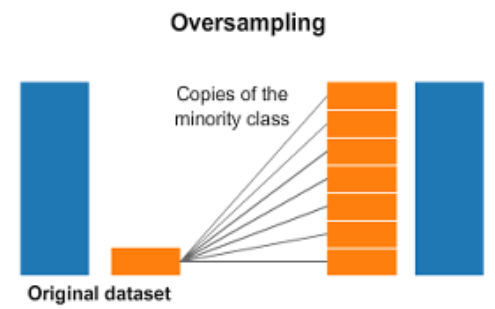

**Advantages**

* **Preservation of Information**: Unlike under-sampling, which removes instances, random over-sampling retains all instances from the minority class. This helps preserve potentially valuable information present in those instances.

* **No Loss of Data**: Random over-sampling does not discard any data from the original dataset, ensuring that no information is lost during the resampling process.

* **No Risk of Overfitting**: Since no data is discarded, there is no risk of overfitting due to loss of potentially important information. This makes random over-sampling a safer option in some scenarios.

**Disadvantages**

* **Potential Overfitting**: Randomly duplicating instances from the minority class may lead to overfitting, especially if the duplicated instances are very similar to existing ones. This can result in the model learning noise in the data.

* **Potential Loss of Diversity**: Random over-sampling may result in a loss of diversity within the minority class, as duplicated instances may not accurately represent the true variability present in the data.

* **Risk of Model Bias**: Duplicated instances from the minority class may introduce bias into the model, as the model may place undue importance on the duplicated instances during training.

**Syntax: RandomUnderSampler(sampling_strategy='auto', random_state=None, replacement=False)**

Parameters:

- **sampling_strategy**: This parameter specifies the sampling strategy to use for resampling. ***'auto'*** is used when we have to Resample to have an equal number of samples for each class. ***'float'*** is used when we have to specify the desired ratio of the number of samples in the minority class to the majority class after resampling. For example, 0.5 means resample the minority class to have 50% of the number of samples in the majority class. ***'dict'*** is used when we have to specify a custom sampling strategy for each class. For example, {0: 1000, 1: 500} means resample class 0 to have 1000 samples and class 1 to have 500 samples.

- **random_state**: This parameter sets the random seed for reproducibility. If set to an integer, it will fix the random state. If set to None, it will use the current system time as the seed.

- **replacement**: This parameter specifies whether to sample with or without replacement. If set to True, random over-sampling will sample with replacement, meaning that the same sample may be duplicated multiple times. If set to False, it will sample without replacement, meaning that each sample will be selected only once.

In [ ]:
# Importing imblearn library for over-sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Printing number of samples
# in each class before Under-Sampling
t = [(d) for d in y if d == 0]
s = [(d) for d in y if d == 1]
print('Before Over-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

Before Over-Sampling: 
Samples in class 0:  945
Samples in class 1:  55


In [ ]:
# Applying random over-sampling
OverS = RandomOverSampler(random_state=42)
X_Over, y_Over = OverS.fit_resample(X, y)

In [ ]:
# Printing number of samples in
# each class after Under-Sampling
t = [(d) for d in y_Over if d == 0]
s = [(d) for d in y_Over if d == 1]
print('After Over-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

After Over-Sampling: 
Samples in class 0:  945
Samples in class 1:  945


- Above code corrects class imbalance in a dataset by using RandomOverSampler from imbalanced-learn.

- In order to achieve a more balanced distribution, samples from the minority class are randomly duplicated.

- For comparison, the number of samples in each class is printed both before and after oversampling.

Now let's train a Logistic Regression model and look at the results to see what happens

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Split the data into train and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_Over, y_Over, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg_over = LogisticRegression()
log_reg_over.fit(X_train_over, y_train_over)

# Predict on the test set
y_pred_over = log_reg_over.predict(X_test_over)

# Calculate evaluation metrics
precision_over = precision_score(y_test_over, y_pred_over)
recall_over = recall_score(y_test_over, y_pred_over)
f1_over = f1_score(y_test_over, y_pred_over)
roc_auc_over = roc_auc_score(y_test_over, y_pred_over)

# Print the evaluation metrics
print("Precision (over-sampling):", precision_over)
print("Recall (over-sampling):", recall_over)
print("F1 Score (over-sampling):", f1_over)
print("ROC AUC Score (over-sampling):", roc_auc_over)


Precision (over-sampling): 0.8650306748466258
Recall (over-sampling): 0.7382198952879581
F1 Score (over-sampling): 0.7966101694915254
ROC AUC Score (over-sampling): 0.8102864182322143


Now, let's take a look at the results obtained -

* **Precision**: With over-sampling, precision is higher at 0.865 compared to 0.727 with under-sampling. This suggests that over-sampling resulted in a higher proportion of true positive predictions among all positive predictions.

* **Recall**: Over-sampling yielded a recall of 0.738, whereas under-sampling had a recall of 0.667. This indicates that over-sampling performs better in capturing actual positive instances, especially in the minority class.

* **F1 Score**: The F1 score with over-sampling is 0.797, which is higher compared to 0.696 with under-sampling. This suggests a better balance between precision and recall with over-sampling.

* **ROC AUC Score**: The ROC AUC score with over-sampling is 0.810, whereas it was 0.683 with under-sampling. This indicates better discrimination ability between classes with the over-sampling approach.

## Synthetic Minority Oversampling Technique (SMOTE)

- It is an Over-Sampling technique.

- SMOTE is used to generate artificial/synthetic samples for the minority class.

- This technique works by randomly choosing a sample from a minority class and determining K-Nearest Neighbors for this sample, then the artificial sample is added between the picked sample and its neighbors. This function is present in imblearn module.

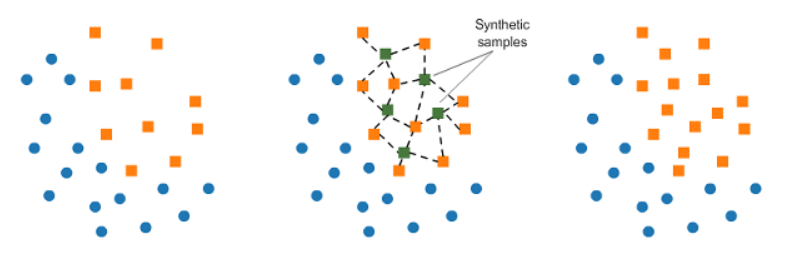

**Syntax: SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)**

Parameters:

- **sampling_strategy**: Sampling Information for dataset
random_state: Used for shuffling the data. If positive non zero number is given then it shuffles otherwise not. Default value is None.

- **k_neighbors**: Number count of nearest neighbours used to generate artificial/synthetic samples. Default value is 5

- **n_jobs**: Number of CPU cores to be used. Default value is None. None here means 1 not 0.

**Working of SMOTE Algorithm**

An algorithm called SMOTE (Synthetic Minority Over-sampling Technique) is used to rectify dataset class imbalances. To put it briefly, SMOTE generates synthetic samples for the minority class.

Here is a quick rundown of how it functions:

- **Identify minority class instances:** Determine which dataset instances belong to the minority class.

- **Select a Minority Instance:** Select a minority instance at random from the dataset.

- **Find Nearest Neighbors:** Determine which members of the minority class are the selected instance's k-nearest neighbors.

- **Generate Synthetic Samples:** By dividing the selected instance by the distance between it and its closest neighbors, create synthetic instances. Usually, to accomplish this, a synthetic instance is made along the line that connects the selected instance and the neighbor, and a random neighbor is chosen.

In [ ]:
# Printing number of samples in
# each class before Over-Sampling
t = [(d) for d in y if d==0]
s = [(d) for d in y if d==1]
print('Before Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

Before Over-Sampling: 
Samples in class 0:  945
Samples in class 1:  55


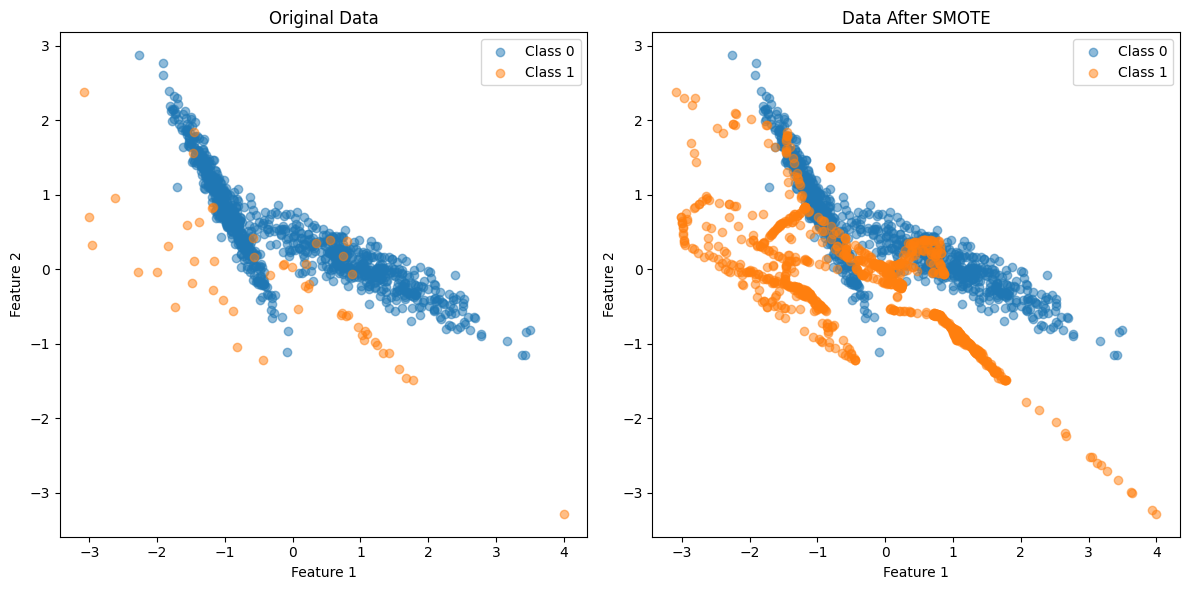

In [ ]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Visualize the data before and after SMOTE
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot data after SMOTE
plt.subplot(1, 2, 2)
plt.scatter(X_smote[y_smote == 0][:, 0], X_smote[y_smote == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_smote[y_smote == 1][:, 0], X_smote[y_smote == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Data After SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Printing number of samples
# in each class after Over-Sampling
t = [(d) for d in y_smote if d==0]
s = [(d) for d in y_smote if d==1]
print('After Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

After Over-Sampling: 
Samples in class 0:  945
Samples in class 1:  945


**Explanation:**

- Minority class is given as input vector.

- Determine its K-Nearest Neighbours

- Pick one of these neighbors and place an artificial sample point anywhere between the neighbor and sample point under consideration.

- Repeat till the dataset gets balanced.

Now, let's train a Logistic Regression model and look at the results

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Split the data into train and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_smote = log_reg_smote.predict(X_test_smote)

# Calculate evaluation metrics
precision_smote = precision_score(y_test_smote, y_pred_smote)
recall_smote = recall_score(y_test_smote, y_pred_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test_smote, y_pred_smote)

# Print the evaluation metrics
print("Precision (SMOTE):", precision_smote)
print("Recall (SMOTE):", recall_smote)
print("F1 Score (SMOTE):", f1_smote)
print("ROC AUC Score (SMOTE):", roc_auc_smote)

Precision (SMOTE): 0.8764705882352941
Recall (SMOTE): 0.7801047120418848
F1 Score (SMOTE): 0.8254847645429363
ROC AUC Score (SMOTE): 0.8339026234006215


Let's take a look at the results -

* **Precision**: With SMOTE, precision is 0.876, which is higher compared to 0.865 with over-sampling. This indicates that SMOTE resulted in a slightly higher proportion of true positive predictions among all positive predictions.

* **Recall**: SMOTE achieved a recall of 0.780, whereas over-sampling had a recall of 0.738. This suggests that SMOTE performs better in capturing actual positive instances, especially in the minority class.

* **F1 Score**: The F1 score with SMOTE is 0.825, which is slightly higher compared to 0.797 with over-sampling. This indicates a slightly better balance between precision and recall with SMOTE.

* **ROC AUC Score**: The ROC AUC score with SMOTE is 0.834, while it was 0.810 with over-sampling. This indicates better discrimination ability between classes with the SMOTE approach.

## Tomek Links

* **It is an Under-Sampling technique**

* Tomek Links are a technique used to reduce the imbalance in imbalanced datasets by removing instances from the majority class that are close to instances from the minority class.

* The main goal of using Tomek Links is to improve the performance of classifiers by making the decision boundary between classes more clear. Also we can use Tomek Links to reduce noises even our data is balanced not only imbalanced data

* While Tomek links can help reduce the imbalance in the dataset, they may not always be sufficient to completely balance the data.

* A **disadvantage** of using Tomek links is that removing too many instances from the majority class can lead to underfitting and a decrease in overall classification performance.

* Additionally, Tomek links may not be able to remove all instances from the majority class that are causing the imbalance, so other techniques such as oversampling the minority class or generating synthetic samples may be necessary to achieve a balanced dataset.

* The **advantages** of using Tomek links include their simplicity, effectiveness in reducing noise and improving classification accuracy, and the ability to identify important instances from the minority class.

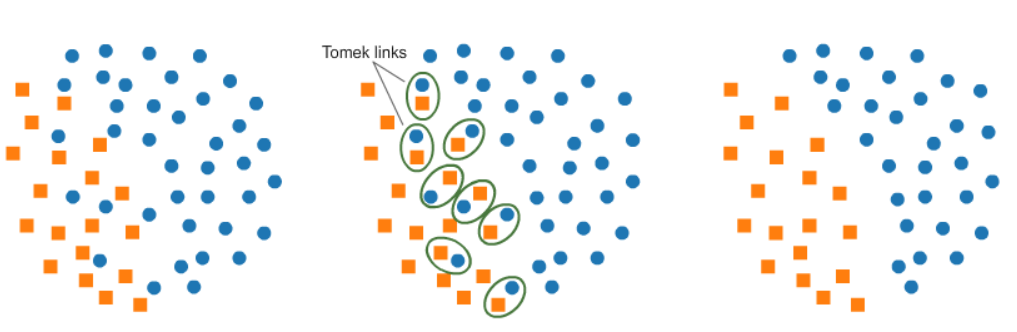

**Working of Tomek Links**

The algorithm iterates through the dataset and compares each instance with its nearest neighbor from a different class. If a pair of instances forms a Tomek link, meaning they are nearest neighbors of each other and belong to different classes, the instance from the majority class (the class with more instances) is removed

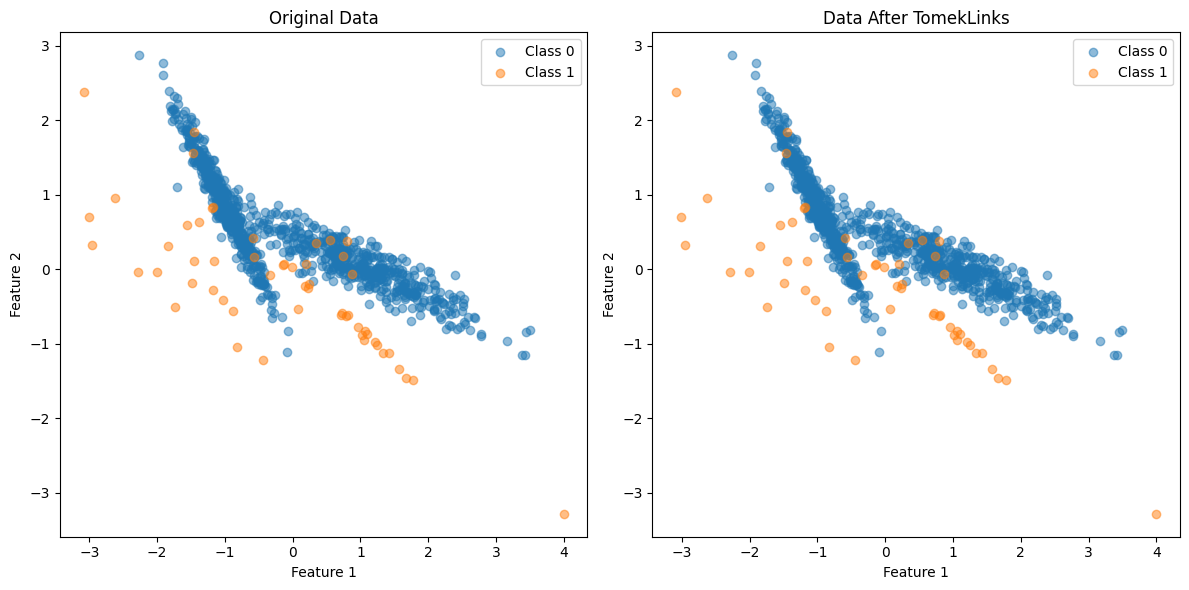

In [ ]:
from imblearn.under_sampling import TomekLinks

# Instantiate TomekLinks
tomek = TomekLinks(sampling_strategy='auto')

# Apply TomekLinks to the dataset
X_tomek, y_tomek = tomek.fit_resample(X, y)

# Visualize the data before and after TomekLinks
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot data after TomekLinks
plt.subplot(1, 2, 2)
plt.scatter(X_tomek[y_tomek == 0][:, 0], X_tomek[y_tomek == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_tomek[y_tomek == 1][:, 0], X_tomek[y_tomek == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Data After TomekLinks')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Printing number of samples
# in each class after Over-Sampling
t = [(d) for d in y_tomek if d==0]
s = [(d) for d in y_tomek if d==1]
print('After TomekLinks: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

After TomekLinks: 
Samples in class 0:  937
Samples in class 1:  55


* As we can see in the graph and results, the number of samples of class 0 decreased from 945 to 937 only.

* In this case, it appears that Tomek links did not identify any Tomek links (pairs of instances from different classes that are nearest neighbors of each other) in the dataset. Consequently, the resulting dataset after applying Tomek links remains the same as the original dataset.

* While the absence of Tomek links may indicate that the classes are well-separated in the feature space, it's also possible that Tomek links were not detected due to the specific distribution of instances in the dataset.

* It might have happened due to the dataset being randomly generated.

* So, there is no point in training the logistic regression model since there is very less significant difference between the original data and this data.

## SMOTE-Tomek

* SMOTE-Tomek is a combination of two resampling techniques: Synthetic Minority Over-sampling Technique (SMOTE) and Tomek links.
* This hybrid approach aims to improve the performance of machine learning models on imbalanced datasets by first oversampling the minority class using SMOTE and then removing ambiguous instances using Tomek links.

**Working of SMOTE-Tomek Algorithm**

* **SMOTE**: The SMOTE algorithm generates synthetic samples for the minority class by interpolating between existing minority class instances. This helps in increasing the representation of the minority class in the dataset.

* **Tomek Links**: After generating synthetic samples with SMOTE, Tomek links are used to identify pairs of instances from different classes that are nearest neighbors of each other. If a pair of instances forms a Tomek link, indicating ambiguity or overlap between classes, the instance from the majority class is removed.

* **Combination**: By combining SMOTE and Tomek links, SMOTE-Tomek aims to address both the oversampling of the minority class and the removal of ambiguous instances. This results in a balanced dataset with reduced ambiguity between classes, which can lead to improved model performance.

Now, let's implement SMOTE-Tomek Links

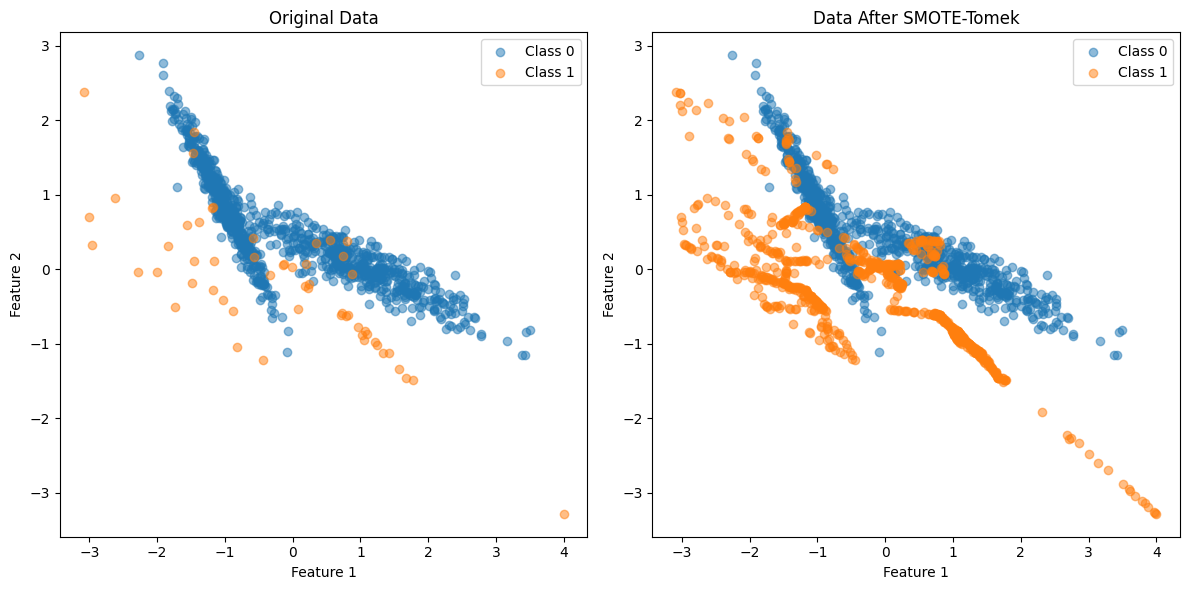

In [ ]:
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek

# Instantiate SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto')

# Apply SMOTE-Tomek to the dataset
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Visualize the data before and after SMOTE-Tomek
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot data after SMOTE-Tomek
plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Data After SMOTE-Tomek')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Printing number of samples
# in each class after SMOTE-Tomek
t = [(d) for d in y_resampled if d==0]
s = [(d) for d in y_resampled if d==1]
print('After SMOTE-Tomek: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

After SMOTE-Tomek: 
Samples in class 0:  902
Samples in class 1:  902


Now, Let's implement a Logistic Regression Model for this data obtained using SMOTE-Tomek

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Split the data into train and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg_resampled = LogisticRegression()
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = log_reg_resampled.predict(X_test_resampled)

# Calculate evaluation metrics
precision_resampled = precision_score(y_test_resampled, y_pred_resampled)
recall_resampled = recall_score(y_test_resampled, y_pred_resampled)
f1_resampled = f1_score(y_test_resampled, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test_resampled, y_pred_resampled)

# Print the evaluation metrics
print("Precision (SMOTE-Tomek):", precision_resampled)
print("Recall (SMOTE-Tomek):", recall_resampled)
print("F1 Score (SMOTE-Tomek):", f1_resampled)
print("ROC AUC Score (SMOTE-Tomek):", roc_auc_resampled)

Precision (SMOTE-Tomek): 0.8630952380952381
Recall (SMOTE-Tomek): 0.8285714285714286
F1 Score (SMOTE-Tomek): 0.8454810495626822
ROC AUC Score (SMOTE-Tomek): 0.852457757296467


* **Precision**: With SMOTE-Tomek, precision is 0.863, which is slightly lower compared to 0.876 with SMOTE alone. This indicates a slight decrease in the proportion of true positive predictions among all positive predictions.

* **Recall**: SMOTE-Tomek achieved a recall of 0.829, whereas SMOTE had a recall of 0.780. This suggests that SMOTE-Tomek performs better in capturing actual positive instances, especially in the minority class, resulting in fewer false negatives.

* **F1 Score**: The F1 score with SMOTE-Tomek is 0.845, which is slightly higher compared to 0.825 with SMOTE alone. This indicates a slightly better balance between precision and recall with SMOTE-Tomek.

* **ROC AUC Score**: The ROC AUC score with SMOTE-Tomek is 0.852, while it was 0.834 with SMOTE alone. This indicates better discrimination ability between classes with the SMOTE-Tomek approach.

## Comparison of the Results

Let's compare the results obtained so far

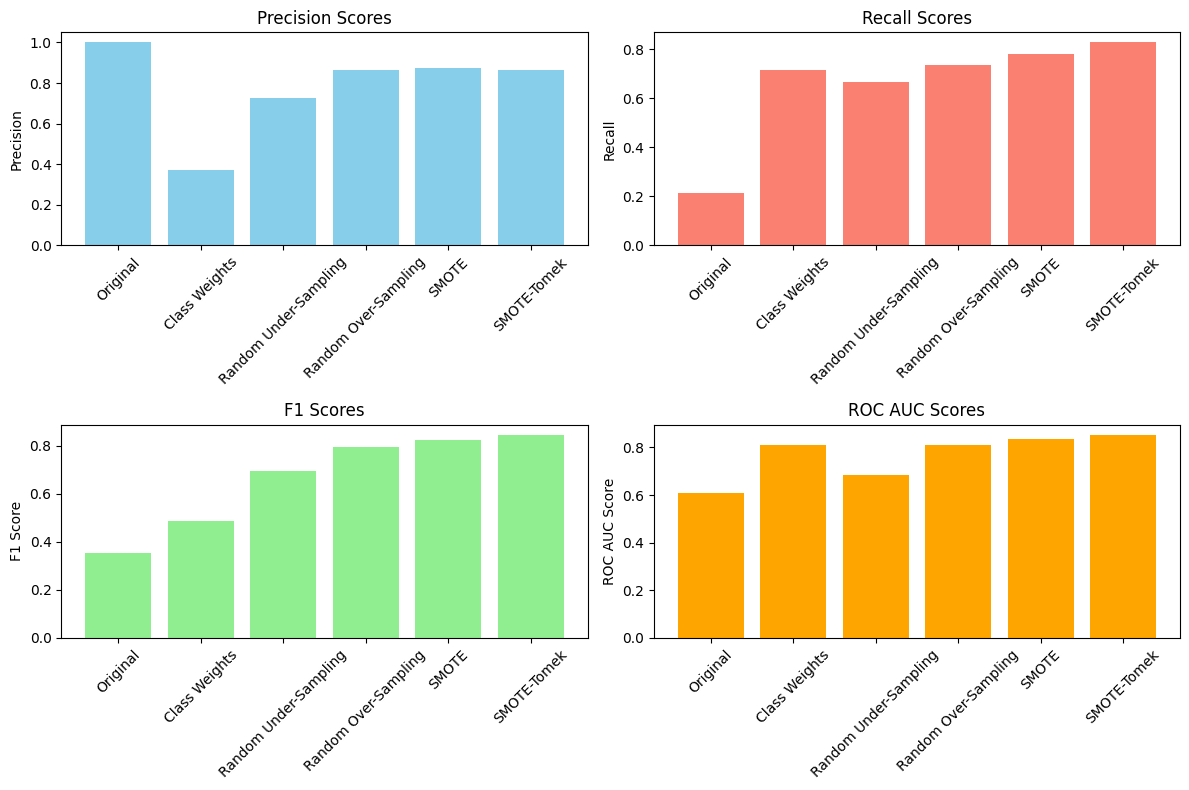

In [ ]:
import matplotlib.pyplot as plt

# Define the evaluation metrics for each model
models = ['Original', 'Class Weights', 'Random Under-Sampling', 'Random Over-Sampling',
          'SMOTE', 'SMOTE-Tomek']
precision_scores = [precision, precision_weighted, precision_under, precision_over,
                    precision_smote, precision_resampled]
recall_scores = [recall, recall_weighted, recall_under, recall_over,
                 recall_smote, recall_resampled]
f1_scores = [f1, f1_weighted, f1_under, f1_over, f1_smote, f1_resampled]
roc_auc_scores = [roc_auc, roc_auc_weighted, roc_auc_under, roc_auc_over,
                  roc_auc_smote, roc_auc_resampled]

# Create subplots for each evaluation metric
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Precision scores
axes[0, 0].bar(models, precision_scores, color='skyblue')
axes[0, 0].set_title('Precision Scores')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].tick_params(axis='x', rotation=45)

# Recall scores
axes[0, 1].bar(models, recall_scores, color='salmon')
axes[0, 1].set_title('Recall Scores')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].tick_params(axis='x', rotation=45)

# F1 scores
axes[1, 0].bar(models, f1_scores, color='lightgreen')
axes[1, 0].set_title('F1 Scores')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# ROC AUC scores
axes[1, 1].bar(models, roc_auc_scores, color='orange')
axes[1, 1].set_title('ROC AUC Scores')
axes[1, 1].set_ylabel('ROC AUC Score')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


These results show the comparison of all the approaches that we have covered for each evaluation metric.

Though it's not necessary, but still let's average out the results in order to rank the methods.

In [ ]:
# Calculate average score across all metrics for each method
average_scores = [(precision + recall + f1 + roc_auc) / 4
                  for precision, recall, f1, roc_auc in
                  zip(precision_scores, recall_scores, f1_scores, roc_auc_scores)]

# Create a dictionary to store method names and their average scores
method_scores = dict(zip(models, average_scores))

# Sort the methods based on their average scores
sorted_methods = sorted(method_scores.items(), key=lambda x: x[1], reverse=True)

# Print the overall ranking
print("Overall Ranking:")
for i, (method, score) in enumerate(sorted_methods, start=1):
    print(f"{i}. {method}: {score:.4f}")


Overall Ranking:
1. SMOTE-Tomek: 0.8474
2. SMOTE: 0.8290
3. Random Over-Sampling: 0.8025
4. Random Under-Sampling: 0.6932
5. Class Weights: 0.5960
6. Original: 0.5436


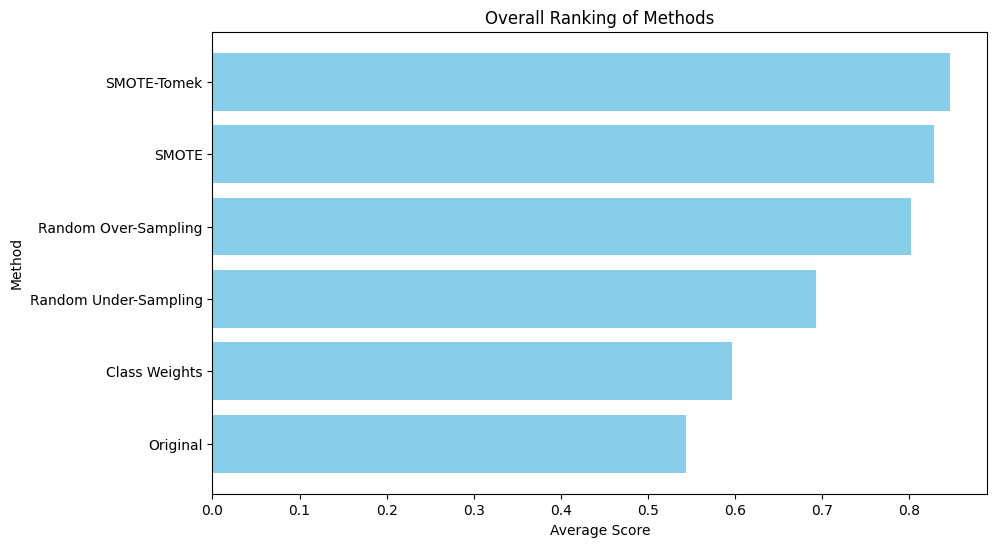

In [ ]:
import matplotlib.pyplot as plt

# Sort the methods based on their average scores
sorted_methods = sorted(method_scores.items(), key=lambda x: x[1], reverse=True)

# Extract method names and average scores
methods = [method for method, _ in sorted_methods]
scores = [score for _, score in sorted_methods]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(methods, scores, color='skyblue')
plt.xlabel('Average Score')
plt.ylabel('Method')
plt.title('Overall Ranking of Methods')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.show()


## Conclusion

Handling imbalanced datasets is crucial for building accurate and reliable machine learning models. In this colab file, we explored various techniques to address class imbalance and improve model performance.

* **Understanding Imbalanced Data**: We learned about the challenges posed by imbalanced datasets, including biased model predictions and poor generalization to minority classes.

* **Techniques for Handling Imbalance**:

* *Class Weights*: Assigning higher weights to minority class samples during model training.
* *Resampling Methods*: Including random under-sampling, random over-sampling, SMOTE, Tomek links, and SMOTE-Tomek to balance class distribution.
* **Evaluation Metrics**: We discussed the importance of choosing appropriate evaluation metrics for imbalanced datasets, such as precision, recall, F1 score, and ROC AUC score.

* **Model Comparison**: By training logistic regression models on various resampled datasets and evaluating them using different metrics, we compared the performance of different techniques and identified the most effective approach for our dataset.

* **Overall Ranking**: Finally, we ranked the methods based on their overall performance, considering multiple evaluation metrics to determine the best approach for handling class imbalance.

In conclusion, effective handling of imbalanced datasets requires a combination of data preprocessing techniques, appropriate evaluation metrics, and careful model selection. By implementing and comparing different methods, we can build more accurate and reliable machine learning models that generalize well to real-world scenarios.